## REDES NEURAIS ARTIFICIAIS ##
### Implementação Multilayer Perceptron Aplicada no problema XOR ###


In [23]:
import numpy as np 
import matplotlib.pyplot as plt

In [24]:
# secante hiperbolica ao quadrado - inversa tangente Hiperbolica 
def sech2(u):
    return 1 / np.cosh(u)**2

In [25]:
# data set do XOR  
x = np.array([[0,0],[0,1],[1,0],[1,1]]) # entradas i2 e i3 (x1, x2)
y = np.array([[-1,1],[1,-1],[1,-1],[-1,1]]) # saidas i9 e i10 (y1, y2)

In [26]:
# criando o bias
i1 = 1
i4 = 1
i5 = 1
i8 = 1

In [27]:
#inicializacao dos pesos
w61 = np.random.uniform() - 0.5
w62 = np.random.uniform() - 0.5
w63 = np.random.uniform() - 0.5
w72 = np.random.uniform() - 0.5
w73 = np.random.uniform() - 0.5
w74 = np.random.uniform() - 0.5
w95 = np.random.uniform() - 0.5
w96 = np.random.uniform() - 0.5
w97 = np.random.uniform() - 0.5
w106 = np.random.uniform() - 0.5
w107 = np.random.uniform() - 0.5
w108 = np.random.uniform() - 0.5

In [28]:
contador_epocas = 0
tol = 0
erro_epoca_atual = tol + 1
n_amostras = 4
max_epocas = 10000
eta = 0.01
erro_epocas = np.zeros(max_epocas)

In [29]:
#treinamento da rede
while (contador_epocas < max_epocas) and (erro_epoca_atual > tol):
    #exibe progresso a cada 10 epocas
    # if contador_epocas % 10 == 0:
    #    print(f"epoca {contador_epocas}")

    #inicializa erro acumulado da epoca
    erro = 0

    #embaralha indices para apresentacao aleatoria dos padroes
    indices_embaralhados = np.random.permutation(n_amostras)

    for i in range(n_amostras):  
        #seleciona indice aleatorio
        indice_selecionado = indices_embaralhados[i]

        #obtem padrao de entrada e saida desejada
        xi = x[indice_selecionado]
        yi = y[indice_selecionado]

        #separa componentes da entrada#
        i2 = xi[0]
        i3 = xi[1]      

        #separa componentes da saida desejada
        y9 = yi[1]
        y10 = yi[0]

        #FASE FORWARD -----------

        #calcula ativacao do neuronio 1 da camada 1
        u6 = i1 * w61 + i2 * w62 + i3 * w63
        i6 = np.tanh(u6)

        #calcula ativacao do neuronio 2 da camada 2
        u7 = i2 * w72 + i3 * w73 + i4 * w74
        i7 = np.tanh(u7)

        #calcula ativacao do neuronio 1 da camada 2
        u9 = i5 * w95 + i6 * w96 + i7 * w97
        i9 = np.tanh(u9)
                #calcula ativacao do neuronio 2 da camada 2
        u10 = i6 * w106 + i7 * w107 + i8 * w108
        i10 = np.tanh(u10)

        #FASE BACKWARD -----------

        #calcula erro da saida
        e9 = y9 - i9
        e10 = y10 - i10

        #ATUALIZACAO DE PESOS DA CAMADA 2

        #PESOS LIGADOS AO NEURONIO 1 DA CAMADA 2

        #calcula gradiente local do neuronio 1 da camada 2
        deltinha9 = e9 * sech2(u9)

        #calcula ajustes dos pesos do neuronio 1 da camada 2
        deltaw95 = eta * deltinha9 * i5
        deltaw96 = eta * deltinha9 * i6
        deltaw97 = eta * deltinha9 * i7

        # atualizacao de pesos ligados ao neuronio 1 da camada 2
        w95 = w95 + deltaw95
        w96 = w96 + deltaw96
        w97 = w97 + deltaw97

        #PESOS LIGADOS AO NEURONIO 2 DA CAMADA 2

        #calcula gradiente local do neuronio 2 da camada 2
        deltinha10 = e10 * sech2(u10)

        #calcula ajustes dos pesos do neuronio 2 da camada 2
        deltaw106 = eta * deltinha10 * i6
        deltaw107 = eta * deltinha10 * i7
        deltaw108 = eta * deltinha10 * i8

        #atualizacao de pesos ligados ao neuronio 2 da camada 2
        w106 = w106 + deltaw106
        w107 = w107 + deltaw107
        w108 = w108 + deltaw108

        #ATUALIZACAO DE PESOS DA CAMADA 1

        #PESOS LIGADOS AO NEURONIO 1 DA CAMADA 1

        #calcula gradiente local do neuronio 1 da camada 1
        deltinha6 = sech2(u6) * (deltinha9 * w96 + deltinha10 * w106)

        #calcula ajustes dos pesos do neuronio 1 da camada 1
        deltaw61 = eta * deltinha6 * i1
        deltaw62 = eta * deltinha6 * i2
        deltaw63 = eta * deltinha6 * i3

        #atualiza pesos do neuronio 1 da camada 1
        w61 = w61 + deltaw61
        w62 = w62 + deltaw62
        w63 = w63 + deltaw63

        #PESOS LIGADOS AO NEURONIO 2 DA CAMADA 1

        #calcula gradiente local do neuronio 2 da camada 1
        deltinha7 = sech2(u7) * (deltinha9 * w97 + deltinha10 * w107)


        #calcula ajustes dos pesos do neuronio 2 da camada 1
        deltaw72 = eta * deltinha7 * i2
        deltaw73 = eta * deltinha7 * i3
        deltaw74 = eta * deltinha7 * i4

        #atualiza pesos do neuronio 2 da camada 1
        w72 = w72 + deltaw72
        w73 = w73 + deltaw73
        w74 = w74 + deltaw74

        #CALCULO DO ERRO
        #acumula erro quadratico do padrao
        erro = erro + (np.pow(e9, 2) + np.pow(e10, 2))
    
    #incrementa contador de epocas
    contador_epocas = contador_epocas + 1

    #calcula erro medio da epoca
    erro_epoca_atual = erro / n_amostras

    #armazena historico de erro
    erro_epocas[contador_epocas - 1] = erro_epoca_atual

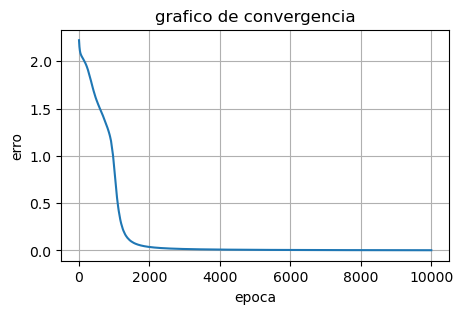

In [30]:
#grafico de convergencia
plt.figure(figsize=(5, 3))
plt.plot(range(contador_epocas), erro_epocas[:contador_epocas])
plt.title('grafico de convergencia')
plt.xlabel('epoca')
plt.ylabel('erro')
plt.grid(True)
plt.show()


x1	x2	yhat1		yhat2
-1.0	1.0	-0.960113	0.960109
1.0	-1.0	0.968551	-0.968548
1.0	-1.0	0.968382	-0.968379
-1.0	1.0	-0.956641	0.956636
